In [17]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import mdtraj as md
import nglview as ngl
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pdb = app.PDBFile('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane.pdb')
forcefield = app.ForceField('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane.gaff2.xml')

In [6]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [7]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127868 kJ/mol
Potential energy after minimization is 5.295784483017486 kJ/mol


In [8]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,29.6246083015317,138.3615280064397
200,34.291994086062516,339.1539386214214
300,40.85005039086012,252.78121051232694
400,35.13551536397353,334.5966959623086
500,41.62973895197171,368.42616233336014
600,39.49354182029296,281.813401495783
700,42.431883959044896,279.679537250719
800,57.32762886131215,239.2990490602837
900,43.319049207244994,234.68159375788062
1000,44.414564299440926,344.87230257044496
1100,35.64046328471661,360.882572769854
1200,29.841303486808975,293.1305799972585
1300,38.19802704422993,341.812687365509
1400,49.584835232665306,281.18934119583844
1500,45.16851176276546,316.80828142060943
1600,54.16469162301145,427.0330651207274
1700,52.76766686296461,339.86317055456703
1800,43.29291876998005,357.38155101364146
1900,49.78583509791876,254.5355339118173
2000,35.661860629555235,336.185971934211
2100,34.715236575477874,361.20363119269314
2200,43.77303671821292,189.09350891170922
2300,43.10315096567126,

In [10]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
10250000,20500.000003258898,29.375217391387835,383.91959357989714,0
10500000,21000.00000336076,29.515089275979108,148.79316632845055,1.83e+04
10750000,21500.000003462625,51.672370764408775,223.22123953918924,1.84e+04
11000000,22000.000003564488,38.03307493664974,491.9108776642585,1.85e+04
11250000,22500.00000366635,42.59768027102655,299.41679263781236,1.85e+04
11500000,23000.000003768215,36.12631911008808,283.65881915667353,1.85e+04
11750000,23500.00000387008,33.12167450995543,304.73800396452367,1.85e+04
12000000,24000.00000397194,57.79504083170524,378.68521817941775,1.85e+04
12250000,24500.000004073805,54.906349681670186,362.3037324485332,1.85e+04
12500000,25000.00000417567,34.313020606166795,396.138528881076,1.85e+04
12750000,25500.000004277532,43.54152201856469,272.2366355793231,1.86e+04
13000000,26000.000004379395,59.2171838479926,251.29578185966267,1.86e+04
13250000,26500.0000

In [13]:
traj = md.load('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane_sim.dcd', top='/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane.pdb')

In [14]:
visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=99999)

In [15]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


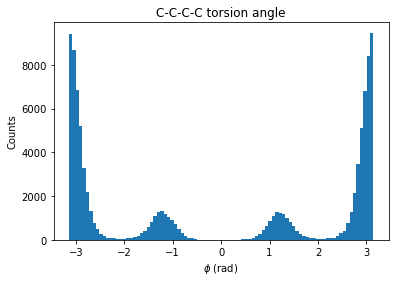

100000.0


In [18]:
phi_indices = [0, 4, 7, 10] # atoms to define the torsion angle
phi = md.compute_dihedrals(traj, [phi_indices])

phicounts, binedges, otherstuff = plt.hist(phi, bins=90) # create a histogram with 90 bins
plt.title('C-C-C-C torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

print(np.sum(phicounts))

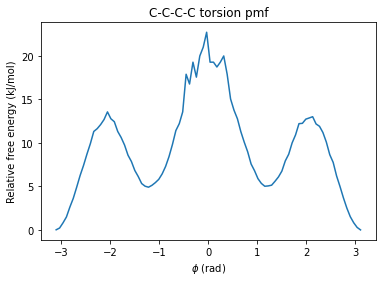

In [20]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature in K
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C-C torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

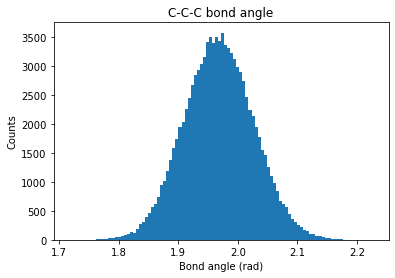

In [21]:
angle_indices = [0, 4, 7] # or could do [4, 7, 10]
bondangle = md.compute_angles(traj, [angle_indices])

anglecounts, binedges, otherstuff = plt.hist(bondangle, bins=100)
plt.title('C-C-C bond angle')
plt.xlabel('Bond angle (rad)')
plt.ylabel('Counts')
plt.show()

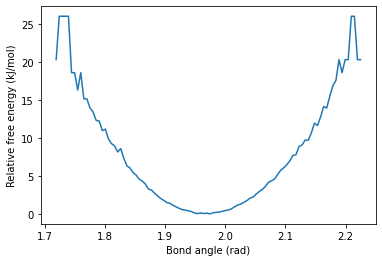

In [22]:
anglecounts[anglecounts==0] = 0.1
pmf = -kB*Temp*np.log(anglecounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2


plt.plot(bincenters, pmf)
plt.xlabel('Bond angle (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()